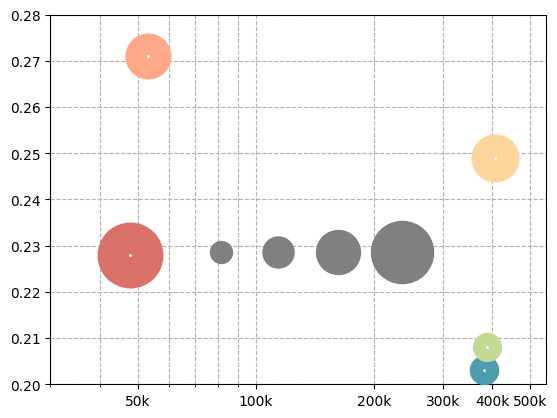

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import math


# 模型预测误差-吞吐量图，点的大小表示参数量

models = {
    'E$^3$Former-OS': {'throughput': 380844.376 , 'accuracy': 0.203 , 'param_size': (412324.000), "color": "#4C9DAE" }, 
    'E$^3$Former-FTPL': {'throughput': 387613.106 , 'accuracy': 0.208 , 'param_size': 401478.000, "color": "#C5D893" },
    'OneNet': {'throughput': 47947.859 , 'accuracy': 0.228 , 'param_size': 2160996.000, "color": "#D97069" },
    'FSNet': {'throughput': 53070.138  , 'accuracy': 0.271 , 'param_size': 1034674.000, "color": "#FFA889" },
    'Time-FSNet': {'throughput': 406733.123  , 'accuracy': 0.249 , 'param_size': 1126322.000, "color": "#FBD59C" },
    # 'GPT4TS': {'throughput': 32091.120  , 'accuracy': 0.253 , 'param_size': 15},
    # 添加更多模型...
}

# 创建图形和轴
fig, ax = plt.subplots()
plt.grid(True, which="both", ls="--", zorder=0)  # 添加网格线，对数尺度时特别有用

# plt.figure(figsize=(12, 6))


# 确定图例中表示的参数量大小点
sizes = [250000, 500000, 1000000, 2000000]  # 举例说明
size_str = ["25k", "50k", '100k', "200k"]
label = [" ", "  ", "   ", "    "]
for i, size in enumerate(sizes):
    ax.scatter([], [], s=size/1000, color='gray', label=label[i])

# 画出所有模型的点
for model, info in models.items():
    x = info['throughput']
    y = info['accuracy']
    size = info['param_size'] / 1000
    ax.scatter(x, y, s=size, color=info['color'],zorder=3)
    ax.scatter(x, y, s=1, color='white',zorder=3)

# ax.set_xlabel('Throughout (QPS)', fontsize=18)
# ax.set_ylabel('MSE', fontsize=18)

# plt.gca().invert_yaxis()
plt.xscale('log')
# plt.gca().xaxis.set_major_locator(ticker.FixedLocator([1, 50000, 150000, 250000, 350000, 450000, 500000]))
# plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))


# 控制图例的位置
# legend = plt.legend(title='点大小表示: ', loc='upper left')
legend = plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.55, 0.4), fontsize=8, frameon=False)
# plt.legend(frameon=False)
plt.xticks([50000, 100000, 200000, 300000, 400000, 500000], 
           ['50k', '100k', '200k', '300k', '400k', '500k'])

plt.ylim(0.20, 0.28)
plt.xlim(30000, 550000)
# 添加虚线边框，首先我们将 fancybox 设置为 False 来取消圆滑边框
legend.get_frame().set_edgecolor('black')  # 设置边框颜色为黑色
legend.get_frame().set_linewidth(1)        # 设置边框宽度
# 以下是设置虚线边框的正确方法，但请注意，这可能在不同版本的matplotlib中表现不同
legend.get_frame().set_linestyle((0, (5, 10)))  # 设置虚线样式

# plt.title('FaaS')
# plt.savefig(f'./figures/throughout.pdf', format='pdf')
plt.show()


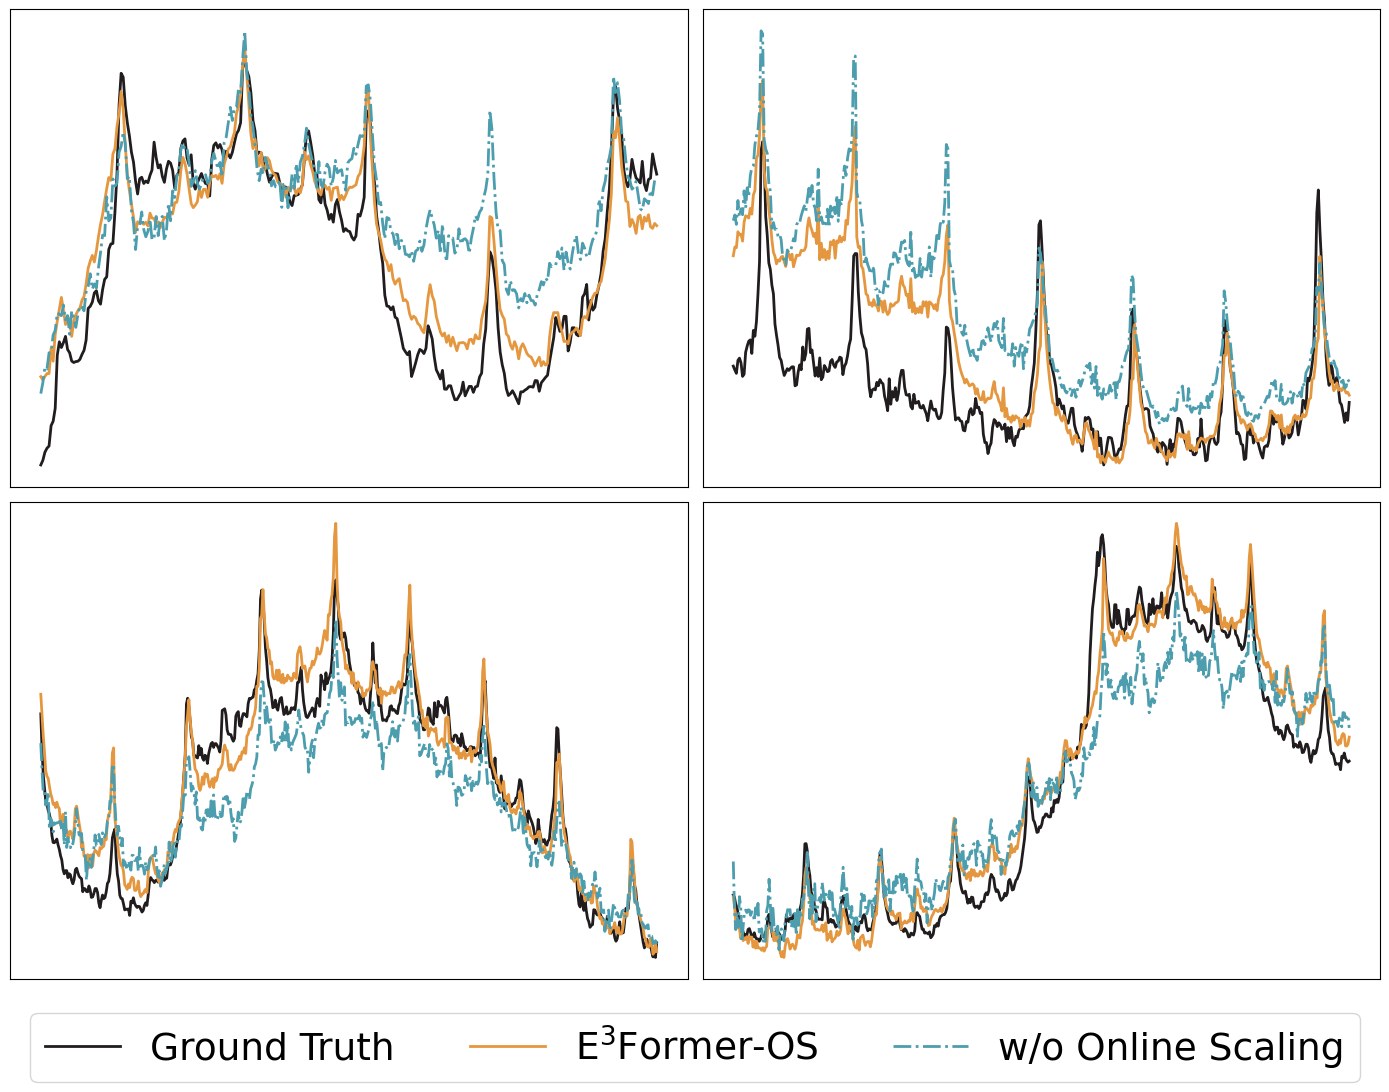

In [17]:
import matplotlib.pyplot as plt
import numpy as np

mimo_file = "/mnt/bn/jiadong2/Online_results/mimo_patch_FaaS_small_1440_pl60_olfull_optadam_tb1_2024_07_23_23_15_13b9/"
mimo_file_without_online = "/mnt/bn/jiadong2/Online_results/mimo_patch_FaaS_small_1440_pl60_olfull_optadam_tb1_2024_07_23_23_09_5284/"
# mimo_greedy_file = "/mnt/bn/jiadong2/Online_results/mimo_patch_FaaS_small_1440_pl60_olfull_optadam_tb1_2024_07_09_16_46_91d2/"
preds = np.load(mimo_file + f"preds.npy")
trues = np.load(mimo_file + f"trues.npy")
preds_offline = np.load(mimo_file_without_online + f"preds.npy")


trues_1d = trues[0,:,:,0].reshape(-1)
preds_1d = preds[0,:,:,0].reshape(-1)
preds_offline_1d = preds_offline[0,:,:,0].reshape(-1)
# aggre_trues_1d = aggregate_by_median(trues_1d, n=5)

trues_1 = trues_1d[-2800:-2500]
preds_1 = preds_1d[-2800:-2500]
preds_offline_1 = preds_offline_1d[-2800:-2500]
trues_4 = trues_1d[-4500:-4000]
preds_4 = preds_1d[-4500:-4000]
preds_offline_4 = preds_offline_1d[-4500:-4000]
trues_3 = trues_1d[6000:6500]
preds_3 = preds_1d[6000:6500]
preds_offline_3 = preds_offline_1d[6000:6500]
trues_2 = trues_1d[9100:9500]
preds_2 = preds_1d[9100:9500]
preds_offline_2 = preds_offline_1d[9100:9500]

# 创建一个2x2的子图布局
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 绘制第一张图
color_groundtrhth = '#211D1F'
color_mimo = '#E5973F'
color_offline = '#4C9DAE'
label_mimo='E$^3$Former-OS'
linewidth =2 
axs[0, 0].plot(trues_1, label='Ground Truth', color=color_groundtrhth, linewidth=linewidth)
axs[0, 0].plot(preds_1, label=label_mimo, color=color_mimo, linewidth=linewidth)
axs[0, 0].plot(preds_offline_1, label='w/o Online Scaling', linestyle='-.', color=color_offline, linewidth=linewidth)

# axs[0, 0].set_title('Plot 1')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

# 绘制第二张图
# axs[0, 1].plot(data2, label='Data 2', linestyle='--')
axs[0, 1].plot(trues_2, label='Ground Truth', color=color_groundtrhth, linewidth=linewidth)
axs[0, 1].plot(preds_2, label=label_mimo, color=color_mimo, linewidth=linewidth)
axs[0, 1].plot(preds_offline_2, label='w/o Online Scaling', linestyle='-.', color=color_offline, linewidth=linewidth)
# axs[0, 1].set_title('Plot 2')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

# 绘制第三张图
# axs[1, 0].plot(data3, label='Data 3', marker='o')
axs[1,0].plot(trues_3, label='Ground Truth', color=color_groundtrhth, linewidth=linewidth)
axs[1,0].plot(preds_3, label=label_mimo, color=color_mimo, linewidth=linewidth)
axs[1,0].plot(preds_offline_3, label='w/o Online Scaling', linestyle='-.', color=color_offline, linewidth=linewidth)
# axs[1, 0].set_title('Plot 3')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

# 绘制第四张图
# axs[1, 1].plot(data4, label='Data 4', color='r', linestyle='--')
axs[1,1].plot(trues_4, label='Ground Truth', color=color_groundtrhth, linewidth=linewidth)
axs[1,1].plot(preds_4, label=label_mimo, color=color_mimo, linewidth=linewidth)
axs[1,1].plot(preds_offline_4, label='w/o Online Scaling', linestyle='-.', color=color_offline, linewidth=linewidth)
# axs[1, 1].set_title('Plot 4')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

# 共享图例
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 0), fontsize=27)

# 调整子图间距
plt.tight_layout()


# 保存图表
plt.savefig('./figures/fix_test.pdf', format='pdf', bbox_inches='tight')

# 显示图表
plt.show()


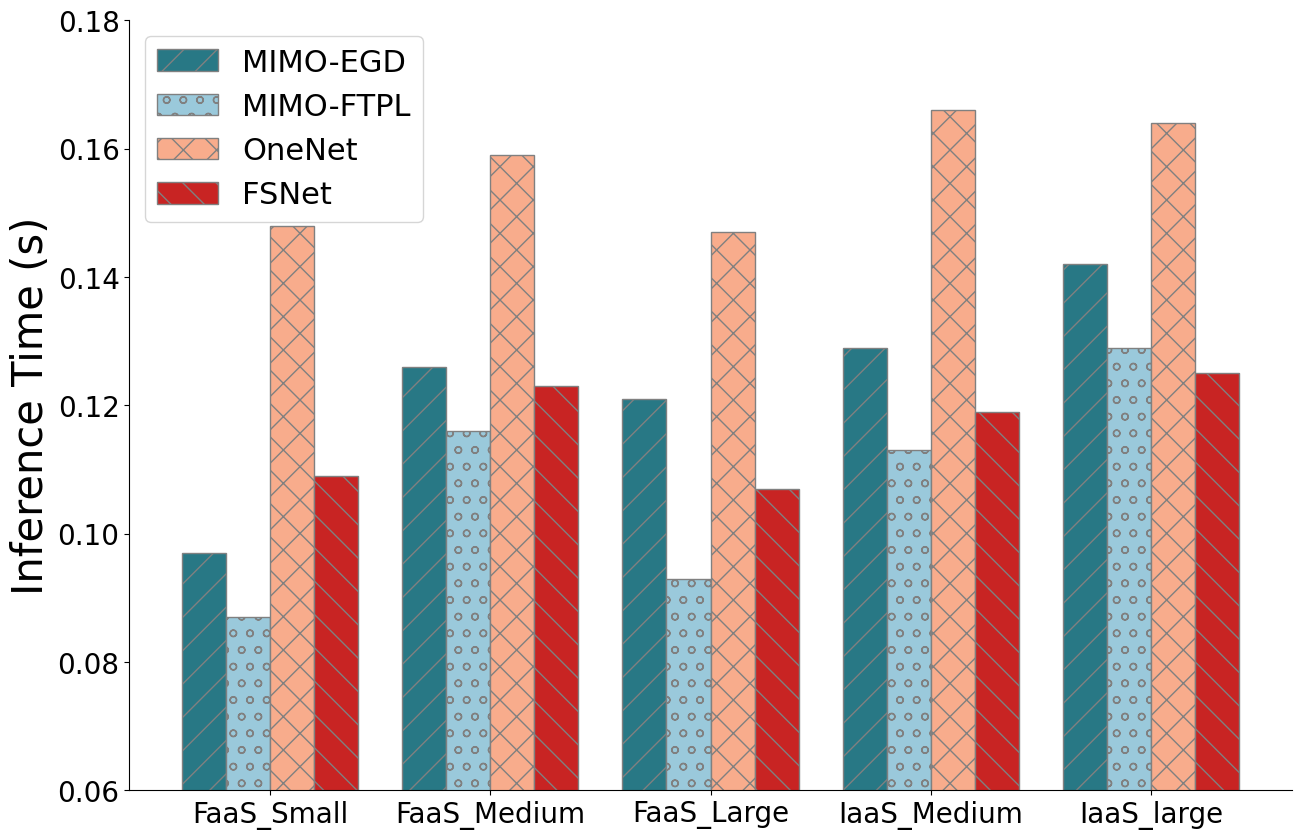

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 数据集名称
datasets = ['FaaS_Small', 'FaaS_Medium', 'FaaS_Large', 'IaaS_Medium', 'IaaS_large']

# 模型的推理时间数据（每行代表一个模型在不同数据集上的推理时间）
model1_times = [0.097,0.126,0.121,0.129,0.142]
model2_times = [0.087,0.116,0.093,0.113,0.129]
model3_times = [0.148,0.159,0.147,0.166,0.164]
model4_times = [0.109,0.123,0.107,0.119,0.125]

# 设置柱状图的位置和宽度
barWidth = 0.2
r1 = np.arange(len(datasets))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# 创建柱状图
plt.figure(figsize=(15, 10))
plt.bar(r1, model1_times, color='#287885', width=barWidth, edgecolor='grey', hatch='/', label='MIMO-EGD')
plt.bar(r2, model2_times, color='#9AC9DB', width=barWidth, edgecolor='grey', hatch='o', label='MIMO-FTPL')
plt.bar(r3, model3_times, color='#F8AC8C', width=barWidth, edgecolor='grey', hatch='x', label='OneNet')
plt.bar(r4, model4_times, color='#C82423', width=barWidth, edgecolor='grey', hatch='\\', label='FSNet')

# 创建Axes实例
ax = plt.gca()

# 设置轴的标签
plt.ylabel('Inference Time (s)',fontsize=30)
plt.xticks([r + barWidth*1.5 for r in range(len(datasets))], datasets, fontsize=20)
plt.tick_params(axis='y', labelsize=20)

# 设置y轴限制
plt.ylim(0.06, 0.18)

# 隐藏四周的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# 创建图例
plt.legend(fontsize=22)

# 显示图表
plt.savefig('./figures/inference_time_1.pdf', format='pdf')  # 将图表保存为PDF格式
plt.show()

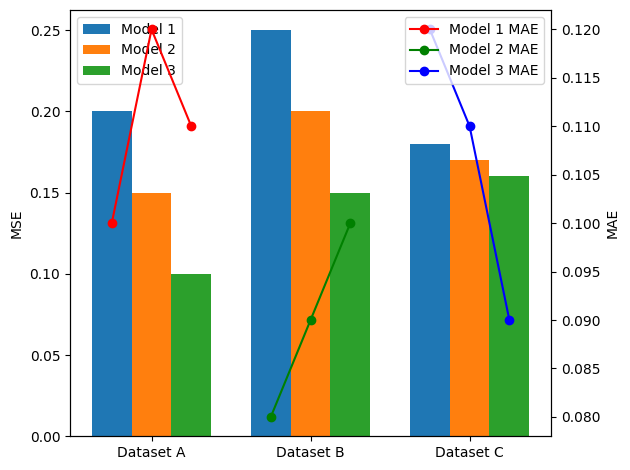

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 假设有3个数据集的数据
datasets = ['Dataset A', 'Dataset B', 'Dataset C']

# 每个模型对于每个数据集的MSE
errors = np.array([
    [0.2, 0.15, 0.1],  # Dataset A的MSE
    [0.25, 0.2, 0.15],  # Dataset B的MSE
    [0.18, 0.17, 0.16]  # Dataset C的MSE
])

# 假设每个模型对于每个数据集的MAE
mae = np.array([
    [0.1, 0.12, 0.11],  # 模型1的MAE
    [0.08, 0.09, 0.1],  # 模型2的MAE
    [0.12, 0.11, 0.09]  # 模型3的MAE
])

n_groups = len(errors)
n_models = errors.shape[1]  # 模型数量

fig, ax = plt.subplots()

# 将折线图的纵轴放在右边
ax2 = ax.twinx()

# 柱子的宽度
width = 0.2

# 每个数据集的基础x轴位置
base_x_positions = np.arange(n_groups) * (n_models+1) * width * 1

# 绘制柱状图
for i in range(n_models):
    # 为每个模型计算偏移量，以在数据集内部调整间距
    model_x_positions = base_x_positions + i * width
    ax.bar(model_x_positions, errors[:, i], width=width, label=f'Model {i+1}')

# 对于每个模型的MAE, 使用折线图表示
colors = ['red', 'green', 'blue']
for i in range(n_models):
    # 为每个模型的MAE选择正确的x轴位置
    mae_x_positions = [base_x_positions[i] + j * width for j in range(len(mae))]
    ax2.plot(mae_x_positions, mae[i, :], marker='o', color=colors[i], linestyle='-', label=f'Model {i+1} MAE')

ax.set_xticks(base_x_positions + width)  # 设置x轴刻度位置在组的中间
ax.set_xticklabels(datasets)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('MSE')
ax2.set_ylabel('MAE')

plt.tight_layout()
plt.show()

(56, 168)


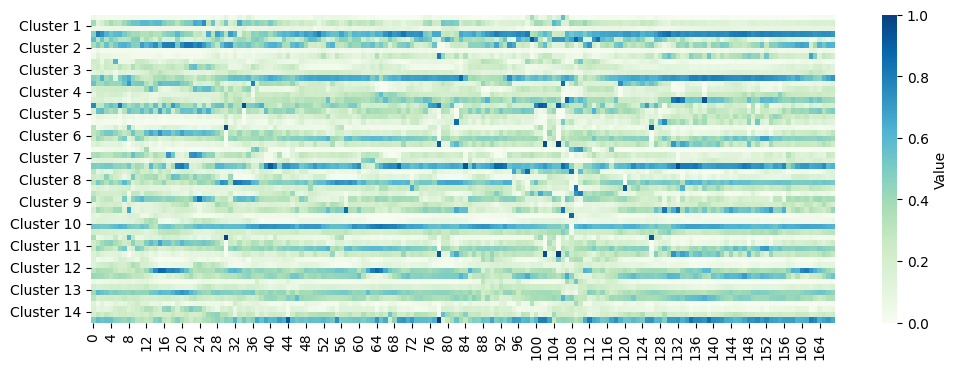

In [28]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# 设置随机种子以获得可重复的结果  
np.random.seed(0)  
  
# 假设n是矩阵的行数，这里我们设置为10作为示例  
n = 7*4
m = 168  
  
# 生成一个n*m的随机矩阵  
# data = np.random.rand(n, m)  # 生成0到1之间的随机数  
data = np.load('weights_128.npy')  # 假设已经有weights.npy这个文件
data = data[:56, :]  # 截取前56行
print(data.shape)  # 打印形状确认
  
# 设置绘图的大小，通过调整figsize来使格子更小  
plt.figure(figsize=(12, 4))  # 宽度为12英寸，高度为4英寸  
  
# 使用seaborn的热力图函数，并设置annot=False来不标注数值  
sns.heatmap(data, cmap='GnBu', vmin=0, vmax=1,  
            cbar_kws={'label': 'Value'},  # 添加颜色条和标签  
            annot=False)  # 不显示数值  
  
# 设置y轴的刻度位置和标签以每四行标注一个cluster
yticks = [i+2 for i in range(0, 56, 4)]  # 生成2, 6, 10, ... 54这样的序列作为y轴的位置
yticklabels = [f'Cluster {i+1}' for i in range(14)]  # 生成Cluster 1到Cluster 14的标签
plt.yticks(yticks, yticklabels)

# 显示图形  
plt.show()